In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Path to Excel file
path = 'sample_-_superstore.xls'
dataframe = pd.read_excel(path)
dataframe.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


1. 5 sản phẩm bán chạy nhất

In [48]:
dataframe_sum = dataframe.groupby('Product Name')['Quantity'].sum().reset_index()
    
dataframe_sorted = dataframe_sum.sort_values(by='Quantity', ascending=False)
    
top_5_products = dataframe_sorted.head(5)


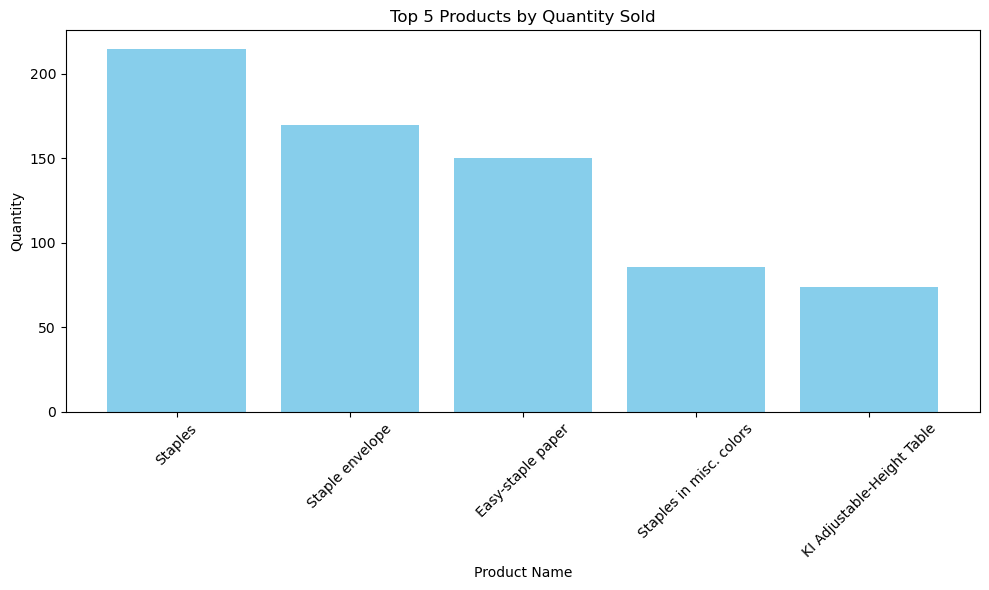

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume dataframe is your DataFrame containing order data

# Group by product name and sum the quantities
product_quantities = dataframe.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort the products by quantity in descending order and get the top 5 products
top_5_products = product_quantities.sort_values(by='Quantity', ascending=False).head()

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(top_5_products['Product Name'], top_5_products['Quantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.title('Top 5 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


"The top 5 best-selling products of the store are Staples, ... Now, further analysis will be conducted on the potential of these top-selling products by finding correlations between these products and other columns to see which columns have a positive correlation with them. This will help us focus on boosting production and capturing the optimal operating time of the products."


2 Order amount in the month


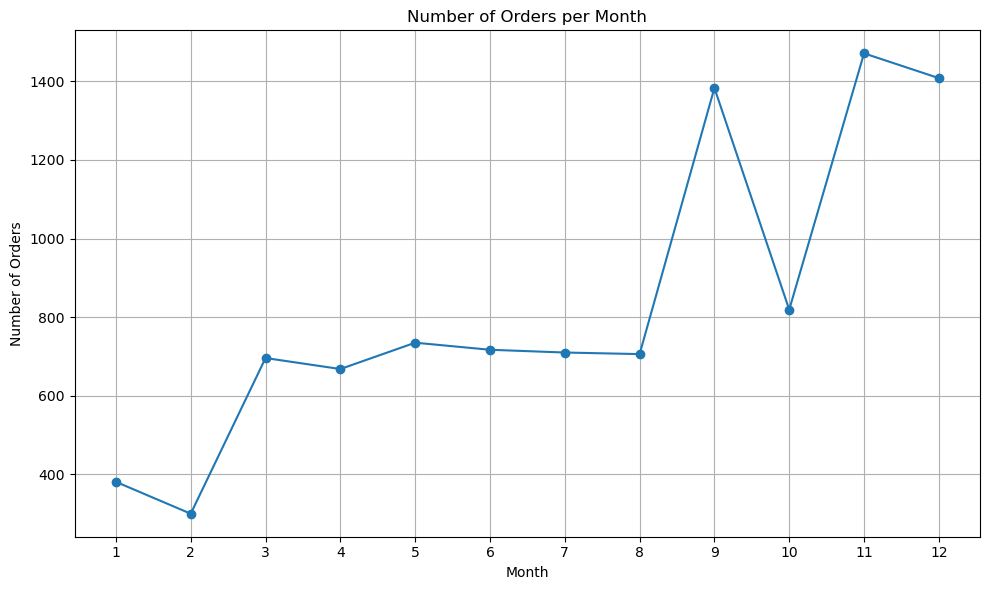

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Tải dữ liệu vào DataFrame
data = pd.read_excel('sample_-_superstore.xls')  # Thay 'sample_-_superstore.xls' bằng tên file Excel của bạn

# Chuyển đổi cột 'Order Date' sang kiểu datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Nhóm dữ liệu theo tháng và đếm số lượng đơn đặt hàng trong mỗi tháng
monthly_order_counts = data.groupby(data['Order Date'].dt.month)['Order Date'].count()

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(monthly_order_counts.index, monthly_order_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.xticks(range(1, 13))  # Giả sử các tháng từ 1 đến 12
plt.grid(True)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()



Through this chart, we can see a significant increase in the number of orders from August to September, and the number of orders is concentrated more in the fourth quarter.

In [8]:


# Đọc dữ liệu từ file Excel và lưu vào DataFrame
dataframe = pd.read_excel('sample_-_superstore.xls')

# Đếm số lượng các giá trị trong cột 'City' và sắp xếp chúng
city_counts_sorted = dataframe['City'].value_counts().sort_values()
print(city_counts_sorted)


City
Manhattan              1
San Luis Obispo        1
Champaign              1
Baytown                1
Arlington Heights      1
                    ... 
Seattle              428
San Francisco        510
Philadelphia         537
Los Angeles          747
New York City        915
Name: count, Length: 531, dtype: int64



The cities with high product consumption are New York, Los Angeles, and Philadelphia.

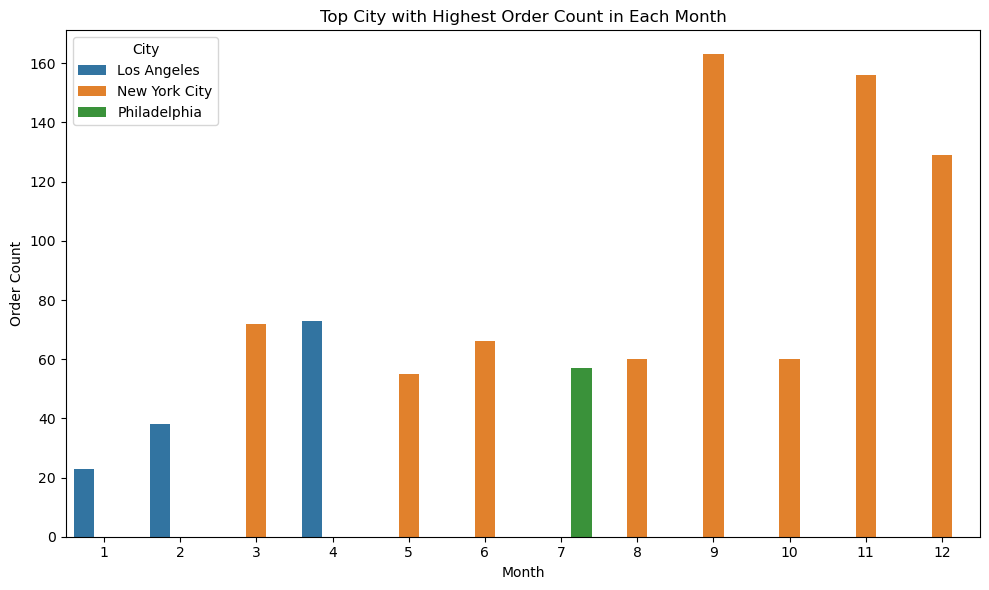

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file Excel và lưu vào DataFrame
dataframe = pd.read_excel('sample_-_superstore.xls')

# Convert 'Order Date' to datetime format
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])

# Extract month from 'Order Date'
dataframe['Month'] = dataframe['Order Date'].dt.month

# Group by 'City' and 'Month' and count the number of orders in each group
city_month_counts = dataframe.groupby(['City', 'Month']).size().reset_index(name='Order Count')

# Sort cities by order count in descending order for each month
city_month_counts_sorted = city_month_counts.sort_values(by=['Month', 'Order Count'], ascending=[True, False])

# Get the top city for each month
top_city_per_month = city_month_counts_sorted.groupby('Month').first().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Order Count', hue='City', data=top_city_per_month)
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.title('Top City with Highest Order Count in Each Month')
plt.legend(title='City')
plt.tight_layout()

# Display the bar chart
plt.show()


3. Density of order date and profit

4. Explore the data

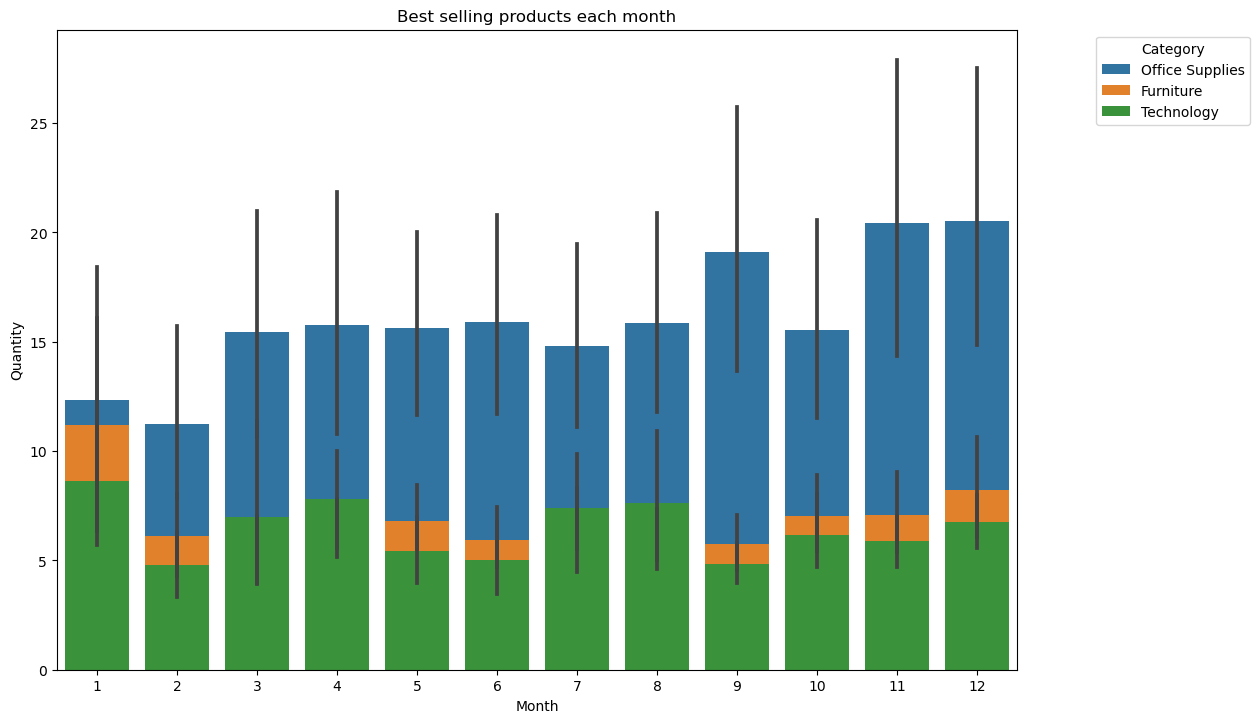

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have 'dataframe' with 'Order Date', 'Product Name', 'City', and 'Quantity' columns

# Convert Order Date to datetime format
dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])

# Extract month from Order Date
dataframe['Month'] = dataframe['Order Date'].dt.month

# Group by Product Name, City, and Month and sum the quantity of products
product_city_month_counts = dataframe.groupby(['Category', 'City', 'Month'])['Quantity'].sum().reset_index()

# Find the top selling product in each city for each month
top_product_per_city_per_month = product_city_month_counts.sort_values(by='Quantity', ascending=False).groupby(['City', 'Month']).head(1)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Quantity', hue='Category', data=top_product_per_city_per_month, dodge=False)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Best selling products each month')
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)  # Adjust layout parameters
plt.show()




In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

data = pd.read_excel('sample_-_superstore.xls')

X = data.drop(['Category', 'Product ID', 'Product Name'], axis=1)  
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region']
continuous_features = ['Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code', 'Quantity', 'Discount', 'Profit']

categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage, "%")
data_new = pd.read_excel('sample_-_superstore.xls')
predictions = pipeline.predict(data_new.drop(['Product ID', 'Product Name'], axis=1))  
print("Predicted categories for new data:")
for category in predictions:
    print(category)




c:\Users\hamy2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 61.330665332666335 %
Predicted categories for new data:
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office Supplies
Office

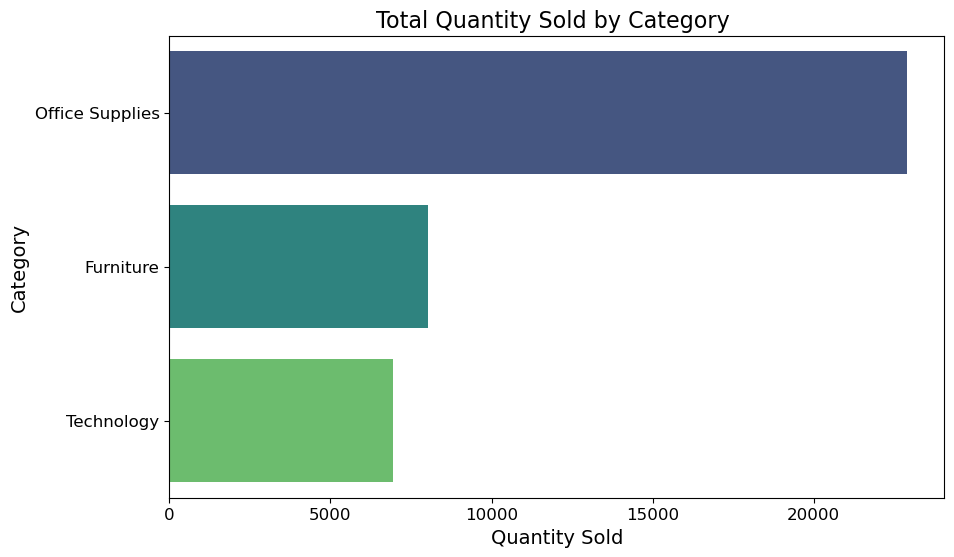

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('sample_-_superstore.xls')
category_sales = data.groupby('Category')['Quantity'].sum().reset_index()
category_sales_sorted = category_sales.sort_values(by='Quantity', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Category', data=category_sales_sorted, palette='viridis')
plt.title('Total Quantity Sold by Category ', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



c:\Users\hamy2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hamy2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


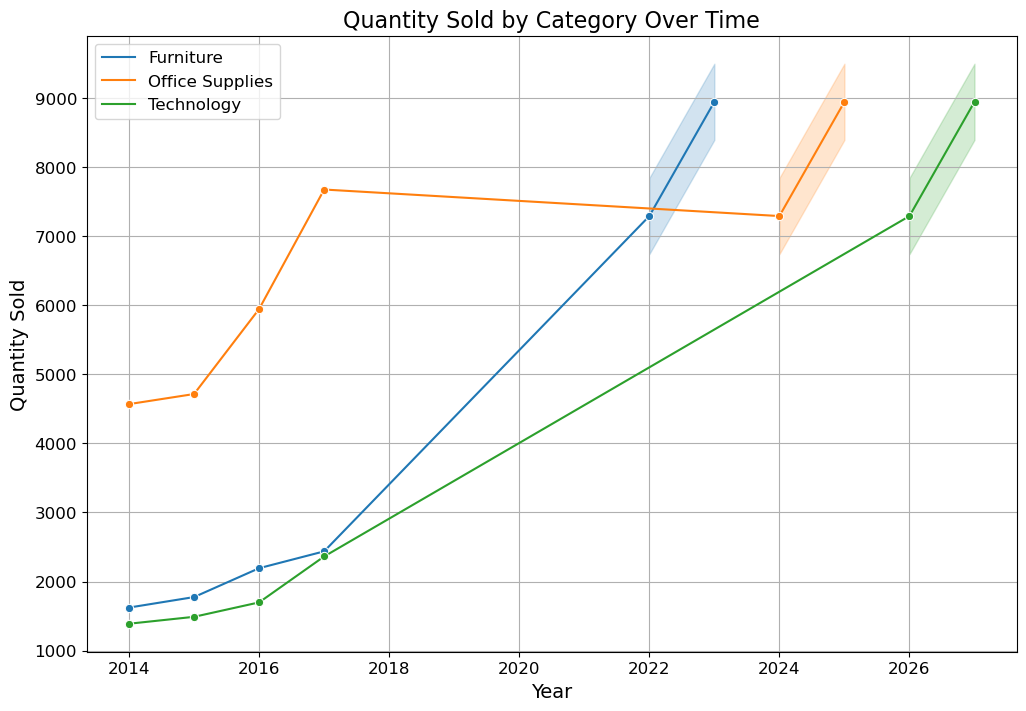

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_excel('sample_-_superstore.xls')
data['Year'] = pd.to_datetime(data['Order Date']).dt.year
category_sales = data.groupby(['Category', 'Year'])['Quantity'].sum().reset_index()
X = category_sales[['Year']]
y = category_sales['Quantity']
model = LinearRegression()
model.fit(X, y)
future_years = pd.DataFrame({'Year': range(2022, 2028)})
future_predictions = model.predict(future_years[['Year']])
future_category_sales = pd.DataFrame({'Category': ['Furniture'] * len(future_years) + 
                                                  ['Office Supplies'] * len(future_years) +
                                                  ['Technology'] * len(future_years),
                                      'Year': sorted(list(future_years['Year']) * 3),
                                      'Quantity': list(future_predictions) * 3})

combined_sales = pd.concat([category_sales, future_category_sales])

plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Quantity', hue='Category', data=combined_sales, marker='o')
plt.title('Quantity Sold by Category Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
